In [24]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_road_segments(year):
    # Construct the file path based on the input year
    file_path = f'datasets_spitsuren_wegvakken/INWEVA_{year}_spits.xlsx'
    
    # Load the Excel file
    data = pd.read_excel(file_path)
    
    # Select the relevant columns
    selected_columns = data[['Wegnr_van','Wegnr_naar','Hm_van','Hm_naar','Traject_van', 'Traject_naar', 
                             'etmaal_AL', 'OS_AL', 'AS_AL', 'Ri_naar', 'Baantype_naar', 'Baantype_van']]
    
    results = []

    for direction in ['R', 'L']:
        for rush_hour, time_period in [('AS_AL', 'Afternoon'), ('OS_AL', 'Morning')]:
        # Filter for road number 4 and other conditions
            df_road_4 = selected_columns[
                (selected_columns['Wegnr_van'] == 4) & 
                (selected_columns['Wegnr_naar'] == 4) & 
                (selected_columns['Baantype_naar'] == 'HR') & 
                (selected_columns['Baantype_van'] == 'HR') & 
                (selected_columns['Ri_naar'] == direction)
            ]
    
            # Sort the filtered DataFrame by 'Hm_van'
            df_road_4_sorted = df_road_4.sort_values(by='Hm_van', ascending=True)
    
            mean_traffic = df_road_4_sorted['OS_AL'].mean()
            std_traffic = df_road_4_sorted['OS_AL'].std()
            distribution = df_road_4_sorted['OS_AL'].describe()

            results.append ({
            'year': year,
            'direction': direction,
            'time_period': time_period,
            'count': distribution['count'],
            'mean_traffic': mean_traffic,
                #'std_traffic': std_traffic,
            'min_traffic': distribution['min'],
                # '25_percentile': distribution['25%'],
                # '50_percentile': distribution['50%'],
                # '75_percentile': distribution['75%'],
            'max_traffic': distribution['max'] 
            })
    return results

years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
road_stats = []

for year in years:
    road_stats.extend(analyze_road_segments(year))

# Create a DataFrame from the collected statistics
stats_df = pd.DataFrame(road_stats)

# Display the DataFrame with statistics for each year, direction, and time period
stats_df

c:\Users\daank\anaconda3\envs\TIL6022\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,year,direction,time_period,count,mean_traffic,min_traffic,max_traffic
0,2012,R,Afternoon,84.0,4701.416667,333.0,12774.0
1,2012,R,Morning,84.0,4701.416667,333.0,12774.0
2,2012,L,Afternoon,79.0,5587.329114,1064.0,16959.0
3,2012,L,Morning,79.0,5587.329114,1064.0,16959.0
4,2013,R,Afternoon,79.0,5110.987342,244.0,12800.0
5,2013,R,Morning,79.0,5110.987342,244.0,12800.0
6,2013,L,Afternoon,76.0,5975.315789,210.0,17994.0
7,2013,L,Morning,76.0,5975.315789,210.0,17994.0
8,2014,R,Afternoon,78.0,5052.730769,283.0,12779.0
9,2014,R,Morning,78.0,5052.730769,283.0,12779.0


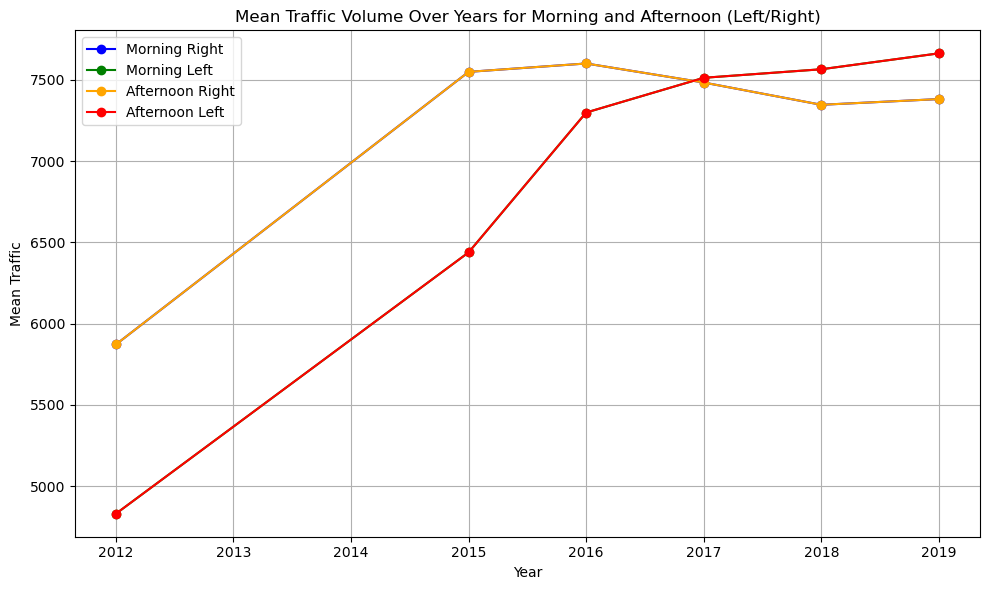

In [20]:
import matplotlib.pyplot as plt

# Assuming 'stats_df' contains the statistics from previous code.
# Create a new figure
plt.figure(figsize=(10, 6))

# Filter data for Morning Right (AS_AL, direction = 'R')
morning_right = stats_df[(stats_df['time_period'] == 'Morning') & (stats_df['direction'] == 'R')]

# Filter data for Morning Left (AS_AL, direction = 'L')
morning_left = stats_df[(stats_df['time_period'] == 'Morning') & (stats_df['direction'] == 'L')]

# Filter data for Afternoon Right (OS_AL, direction = 'R')
afternoon_right = stats_df[(stats_df['time_period'] == 'Afternoon') & (stats_df['direction'] == 'R')]

# Filter data for Afternoon Left (OS_AL, direction = 'L')
afternoon_left = stats_df[(stats_df['time_period'] == 'Afternoon') & (stats_df['direction'] == 'L')]

# Plot the data
plt.plot(morning_right['year'], morning_right['mean_traffic'], label='Morning Right', marker='o', color='blue')
plt.plot(morning_left['year'], morning_left['mean_traffic'], label='Morning Left', marker='o', color='green')
plt.plot(afternoon_right['year'], afternoon_right['mean_traffic'], label='Afternoon Right', marker='o', color='orange')
plt.plot(afternoon_left['year'], afternoon_left['mean_traffic'], label='Afternoon Left', marker='o', color='red')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Mean Traffic')
plt.title('Mean Traffic Volume Over Years for Morning and Afternoon (Left/Right)')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd

# List of file paths for the datasets for each year (2012 to 2019)
data_files = {
    2012: 'datasets_spitsuren_wegvakken/INWEVA_2012_spits.xlsx',
    2013: 'datasets_spitsuren_wegvakken/INWEVA_2013_spits.xlsx',
    2014: 'datasets_spitsuren_wegvakken/INWEVA_2014_spits.xlsx',
    2015: 'datasets_spitsuren_wegvakken/INWEVA_2015_spits.xlsx',
    2016: 'datasets_spitsuren_wegvakken/INWEVA_2016_spits.xlsx',
    2017: 'datasets_spitsuren_wegvakken/INWEVA_2017_spits.xlsx',
    2018: 'datasets_spitsuren_wegvakken/INWEVA_2018_spits.xlsx',
    2019: 'datasets_spitsuren_wegvakken/INWEVA_2019_spits.xlsx',
}

# Initialize an empty list to store results
results = []

# Loop through the datasets
for year, file in data_files.items():
    # Load the dataset for the year
    df = pd.read_excel(file)
    
    # Filter the data for road 4 with HR (Hoofdroute)
    df_road_4HR = df[(df['Wegnr_van'] == 4) & (df["Wegnr_naar"] == 4) & (df['Baantype_naar'] == 'HR') & (df['Baantype_van'] == 'HR')]
    
    # Further filter for Hectometer <= 150,000
    df_road_4HR_HM = df_road_4HR[(df_road_4HR['Hm_van'] <= 150000) & (df_road_4HR['Hm_naar'] <= 150000)]
    
    # Separate data for 'R' (right) direction
    #df_road_4HR_HM_R = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'R') & (df_road_4HR_HM['Ri_naar'] == 'R')]
    #df_road_4HR_HM_L = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'L') & (df_road_4HR_HM['Ri_naar'] == 'L')]
    
    # Calculate the mean score for OS_AL (morning rush) and AS_AL (afternoon rush)
    mean_score_R_OS = df_road_4HR_HM['OS_AL'].mean()
    mean_score_R_AS = df_road_4HR_HM['AS_AL'].mean()

    #mean_score_R_OS_L = df_road_4HR_HM_L['OS_AL'].mean()
    #mean_score_R_AS_L = df_road_4HR_HM_L['AS_AL'].mean()
    
     # Store the results for the right side
    results.append({
        'Year': year,
        'Rush': 'Morning',  # OS represents morning rush hour
        'Direction': 'Both',   # Right-hand side
        'Mean Score': mean_score_R_OS
    })
    
    results.append({
        'Year': year,
        'Rush': 'Afternoon',  # AS represents afternoon rush hour
        'Direction': 'Both',      # Right-hand side
        'Mean Score': mean_score_R_AS
    })
    
    # # Store the results for the left side
    # results.append({
    #     'Year': year,
    #     'Rush': 'Morning',  # OS represents morning rush hour
    #     'Direction': 'L',   # Left-hand side
    #     'Mean Score': mean_score_R_OS
    # })
    
    # results.append({
    #     'Year': year,
    #     'Rush': 'Afternoon',  # AS represents afternoon rush hour
    #     'Direction': 'L',      # Left-hand side
    #     'Mean Score': mean_score_R_AS
    # })

# Convert the results into a DataFrame
df_results = pd.DataFrame(results)

# Export the results to an Excel file
df_results.to_excel('mean_scores_road4_HR_R_2012_2019.xlsx', index=False)

display(df_results)

c:\Users\daank\anaconda3\envs\TIL6022\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Year,Rush,Direction,Mean Score
0,2012,Morning,Both,5381.678571
1,2012,Afternoon,Both,5599.828571
2,2013,Morning,Both,6187.233871
3,2013,Afternoon,Both,6385.008065
4,2014,Morning,Both,5645.300000
5,2014,Afternoon,Both,5904.784615
6,2015,Morning,Both,8033.833333
7,2015,Afternoon,Both,8463.466667
8,2016,Morning,Both,8509.385417
9,2016,Afternoon,Both,8788.333333


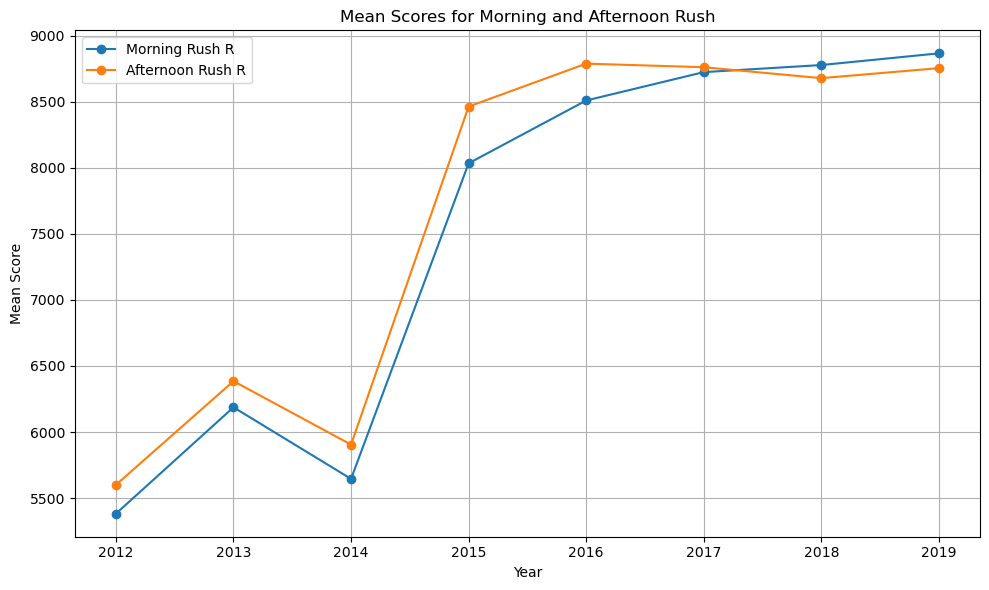

In [27]:
import matplotlib.pyplot as plt

df = df_results

# Pivot the data for easier plotting
# This will create separate columns for each combination of Rush and Direction
pivot_df = df.pivot_table(index='Year', columns=['Rush'], values='Mean Score')

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the four lines for Morning and Afternoon, L and R directions
plt.plot(pivot_df.index, pivot_df[('Morning')], label='Morning Rush R', marker='o')
plt.plot(pivot_df.index, pivot_df[('Afternoon')], label='Afternoon Rush R', marker='o')

# Add titles and labels
plt.title('Mean Scores for Morning and Afternoon Rush')
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()